In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import pandas as pd
data=pd.read_csv("DataAvrgFinal2.csv")
data.head(10)

,City,State,Year,Zipcode_x,AvrgCommute,AvrgIncome,Zipcode_y,Avrg_HomeValue,MedianMonthly_HC,Zipcode,Number
0,Abilene,Texas,2013,2000,18.677578,31837.111507,1000,89700.0,740.0,1000,48
1,Abilene,Texas,2014,2000,19.269898,32825.921984,1000,103000.0,800.0,1000,48
2,Abilene,Texas,2015,2000,17.774664,34969.874497,1000,113400.0,805.0,1000,48
3,Abilene,Texas,2016,2000,21.091624,33090.747895,1000,107200.0,797.0,1000,48
4,Abilene,Texas,2017,2000,20.318681,37638.016147,1000,114900.0,784.0,1000,48
5,Akron,Ohio,2013,2000,26.596720,31964.392992,1000,78600.0,717.0,1000,39
6,Akron,Ohio,2014,2000,26.222661,31517.275773,1000,80300.0,730.0,1000,39
7,Akron,Ohio,2015,2000,27.322526,34961.820853,1000,80600.0,708.0,1000,39
8,Akron,Ohio,2016,2000,26.151451,34155.503968,1000,78000.0,725.0,1000,39
9,Akron,Ohio,2017,2000,25.868104,31342.588614,1000,81600.0,736.0,1000,39


In [2]:
dataLCcities=data.groupby(['City','State'], as_index=False).mean()
#data5cities.head()
dataLCcities=dataLCcities.dropna()
p = np.percentile(dataLCcities['AvrgCommute'], 75)
p

35.593908403599784

In [3]:

dataLCcities=dataLCcities[dataLCcities['AvrgCommute']>=p]
list1=dataLCcities['City'].unique()
list1

array(['Alameda', 'Alexandria', 'Alhambra', 'Alpharetta', 'Antioch',
       'Apple Valley town', 'Arlington Heights village', 'Atascocita CDP',
       'Auburn', 'Baldwin Park', 'Baltimore', 'Bayam?n zona urbana',
       'Bayamon zona urbana', 'Bayamón zona urbana', 'Bayonne',
       'Bellflower', 'Berkeley', 'Bethesda CDP', 'Bolingbrook village',
       'Boston', 'Brockton', 'Buckeye', 'Buena Park',
       'Caguas zona urbana', 'Carolina zona urbana', 'Castro Valley CDP',
       'Centreville CDP', 'Chicago', 'Chino', 'Chino Hills',
       'Cicero town', 'Columbia CDP', 'Compton', 'Concord', 'Corona',
       'Dale City CDP', 'Daly City', 'Deltona', 'Downey',
       'East Los Angeles CDP', 'East Orange', 'El Monte', 'Elk Grove',
       'Ellicott City CDP', 'Evanston', 'Fairfield', 'Federal Way',
       'Florence-Graham CDP', 'Fontana', 'Framingham CDP', 'Frederick',
       'Fremont', 'Frisco', 'Fullerton', 'Gaithersburg', 'Germantown CDP',
       'Gresham', 'Hayward', 'Hemet', 'Hesperia'

In [10]:
correlation=data[data['Year']==2017]
correlation=correlation.dropna()
from scipy.stats import linregress


In [11]:
linregress(correlation['AvrgCommute'], correlation['AvrgIncome'])

LinregressResult(slope=788.4860730948319, intercept=26061.164049199244, rvalue=0.3607220082780595, pvalue=3.49611956066377e-20, stderr=82.67975446995084)

/Users/wandabaghel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Users/wandabaghel/anaconda3/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/wandabaghel/anaconda3/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/wandabaghel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/wandabaghel/anaconda3/lib/python3.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/wandabaghel/anaconda3/lib/python3.7/site-packages/ipykernel

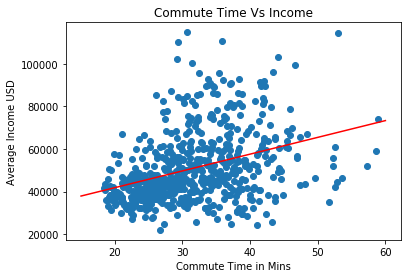

In [14]:
from sklearn.linear_model import LinearRegression
import matplotlib
matplotlib.use('qt5agg')

x = correlation['AvrgCommute']
y = correlation['AvrgIncome']

# Create model
model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)

xfit = np.linspace(15, 60, 5)
yfit = model.predict(xfit[:, np.newaxis])

# plot
plt.scatter(x, y)
plt.plot(xfit, yfit,color='red')
plt.ylabel('Average Income USD')
plt.xlabel('Commute Time in Mins')
plt.title('Commute Time Vs Income')
plt.savefig('Correlation Commute Vs Income.png')
plt.show()

In [15]:
linregress(correlation['AvrgCommute'], correlation['Avrg_HomeValue'])

LinregressResult(slope=12339.972680844372, intercept=-73935.94494874787, rvalue=0.3981186032263769, pvalue=1.3267712022959368e-24, stderr=1153.1276985512993)

/Users/wandabaghel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Users/wandabaghel/anaconda3/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/wandabaghel/anaconda3/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/wandabaghel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/wandabaghel/anaconda3/lib/python3.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/wandabaghel/anaconda3/lib/python3.7/site-packages/ipykernel

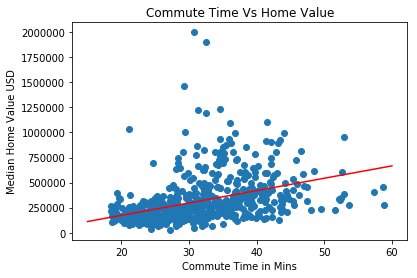

In [16]:
from sklearn.linear_model import LinearRegression
import matplotlib
matplotlib.use('qt5agg')

x = correlation['AvrgCommute']
y = correlation['Avrg_HomeValue']

# Create model
model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)

xfit = np.linspace(15, 60, 5)
yfit = model.predict(xfit[:, np.newaxis])

# plot
plt.scatter(x, y)
plt.plot(xfit, yfit,color='red')
plt.ylabel('Median Home Value USD')
plt.xlabel('Commute Time in Mins')
plt.title('Commute Time Vs Home Value')
plt.savefig('Correlation Commute Vs HomeValue.png')
plt.show()

In [18]:
linregress(correlation['AvrgCommute'], correlation['MedianMonthly_HC'])

LinregressResult(slope=33.141173989127616, intercept=206.1339983619082, rvalue=0.5854967774001435, pvalue=2.0877880997149674e-57, stderr=1.8609650957471813)

/Users/wandabaghel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Users/wandabaghel/anaconda3/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/wandabaghel/anaconda3/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/wandabaghel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/wandabaghel/anaconda3/lib/python3.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/wandabaghel/anaconda3/lib/python3.7/site-packages/ipykernel

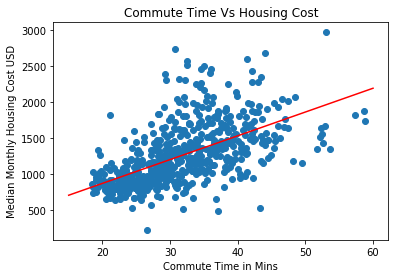

In [19]:
from sklearn.linear_model import LinearRegression
import matplotlib
matplotlib.use('qt5agg')

x = correlation['AvrgCommute']
y = correlation['MedianMonthly_HC']

# Create model
model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)

xfit = np.linspace(15, 60, 5)
yfit = model.predict(xfit[:, np.newaxis])

# plot
plt.scatter(x, y)
plt.plot(xfit, yfit,color='red')
plt.ylabel('Median Monthly Housing Cost USD')
plt.xlabel('Commute Time in Mins')
plt.title('Commute Time Vs Housing Cost')
plt.savefig('Correlation Commute Vs HousingCost.png')
plt.show()

In [28]:
rvalueHC=[]
pvalueHC=[]
rvalueI=[]
pvalueI=[]
rvalueHV=[]
pvalueHV=[]
years=[2013,2014,2015,2016,2017]
for i in years:
    correlation=data[data['Year']==i]
    correlation=correlation.dropna()
    rvalueHC.append(linregress(correlation['AvrgCommute'], correlation['MedianMonthly_HC']).rvalue)
    pvalueHC.append(linregress(correlation['AvrgCommute'], correlation['MedianMonthly_HC']).pvalue)
    rvalueI.append(linregress(correlation['AvrgCommute'], correlation['AvrgIncome']).rvalue)
    pvalueI.append(linregress(correlation['AvrgCommute'], correlation['AvrgIncome']).pvalue)
    rvalueHV.append(linregress(correlation['AvrgCommute'], correlation['Avrg_HomeValue']).rvalue)
    pvalueHV.append(linregress(correlation['AvrgCommute'], correlation['Avrg_HomeValue']).pvalue)

dataCorr=pd.DataFrame({'Year':years,
                      'r-valueHC':rvalueHC,
                      'p-valueHC':pvalueHC,
                      'r-valueI':rvalueI,
                      'p-valueI':pvalueI,
                      'r-valueHV':rvalueHV,
                      'p-valueHV':pvalueHV})
dataCorr

,Year,r-valueHC,p-valueHC,r-valueI,p-valueI,r-valueHV,p-valueHV
0,2013,0.559521,2.994164e-49,0.336047,7.872885e-17,0.342791,1.721954e-17
1,2014,0.567053,1.691301e-51,0.349042,2.404636e-18,0.379813,1.101724e-21
2,2015,0.576878,4.433927e-54,0.354209,4.989769e-19,0.370303,8.930833e-21
3,2016,0.566642,1.361364e-52,0.356840,1.412143e-19,0.364985,1.805661e-20
4,2017,0.585497,2.087788e-57,0.360722,3.496120e-20,0.398119,1.326771e-24


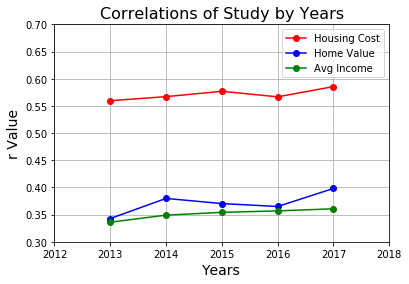

In [43]:
plt.plot(dataCorr['Year'],dataCorr['r-valueHC'], marker='o', color='red',label='Housing Cost')
plt.plot(dataCorr['Year'],dataCorr['r-valueHV'], marker='o', color='blue',label='Home Value')
plt.plot(dataCorr['Year'],dataCorr['r-valueI'], marker='o', color='green',label='Avg Income')
plt.xlim(2012,2018,1)
plt.ylim(0.3,0.7,0.05)
plt.legend()
plt.xlabel('Years',fontsize='14')
plt.ylabel('r Value', fontsize='14')
plt.title('Correlations of Study by Years',fontsize='16')
plt.grid()
plt.savefig('Correlations of Study by Years.png')
plt.show()